In [73]:
!pip3 install pandas
!pip3 install Matplotlib
!pip3 install nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


[nltk_data] Downloading package wordnet to /Users/Varvara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
from collections import Counter
from collections import defaultdict

# Работа с данными

In [74]:
my_file_main = pd.read_csv("ted_main.csv")
my_file_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [75]:
my_file_tran = pd.read_csv("transcripts.csv")
my_file_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [76]:
transcript = my_file_tran['transcript']

In [77]:
my_file_main['transcript'] = transcript

In [78]:
my_file_main.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


# Анализ тем самых просматриваемых выступлений

In [79]:
dict_titles = dict()
titles = my_file_main.sort_values(by="views").tail(100)["name"]
for row in titles:
    dict_titles[row.split(":")[0]] = row.split(":")[1].strip(' ')

In [146]:
#dict_titles

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [11]:
sentence = "What makes a good life? Lessons from the longest study on happiness"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

['What', 'make', 'a', 'good', 'life', '?', 'Lessons', 'from', 'the', 'long', 'study', 'on', 'happiness']


In [23]:
full_lemmas = list()

In [24]:
for key in dict_titles:
    lem_sent = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(dict_titles[key])]
    for lem in lem_sent:
        full_lemmas.append(lem.lower())
#print(full_lemmas)

# words = [word for word in lemmas if word.isalpha()]
# final = ' '.join(words)  
# final   

In [25]:
words = [w for w in full_lemmas if w.isalpha()] # исключаем все небуквенные символы
final = ' '.join(words) # обьединяем финальный результат в строку

In [147]:
#final

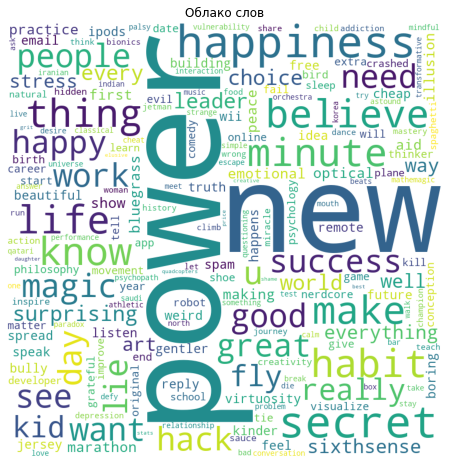

In [27]:
# строим облако из слов
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(final)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

In [80]:
counter = 0

In [81]:
for key in dict_titles:
    if re.findall(r'what|when|why|how|who|where|do|does', dict_titles[key], flags=re.IGNORECASE):
        print(dict_titles[key])
        counter += 1
print(counter)

Why we all need to practice emotional first aid
Optical illusions show how we see
What makes us feel good about our work?
Why people believe weird things
How to speak so that people want to listen
How to get your ideas to spread
This is what happens when you reply to spam email
Why you will fail to have a great career
What really matters at the end of life
How to tie your shoes
How I hacked online dating
How to start a movement
Why do we sleep?
Do schools kill creativity?
How great leaders inspire action
Why we have too few women leaders
How to live before you die
Why 30 is not the new 20
How to stay calm when you know you'll be stressed
Why we love, why we cheat
The paradox of choice
How to make stress your friend
How I held my breath for 17 minutes
What makes a good life? Lessons from the longest study on happiness
How to spot a liar
Why we do what we do
Your body language may shape who you are
27


In [140]:
counter2 = 0
for key in dict_titles:
    if re.findall(r'the.*\w* of', dict_titles[key], flags=re.IGNORECASE):
        counter2 += 1
counter2

21

In [141]:
[counter, counter2, 100 - (counter + counter2)]

[27, 21, 52]

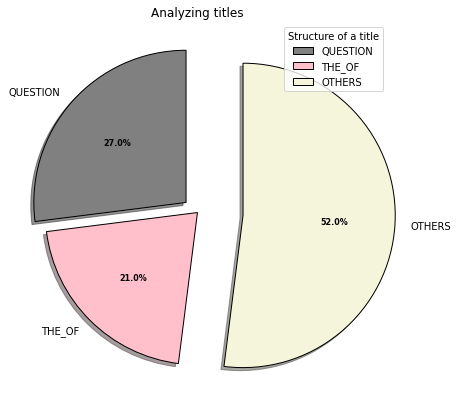

In [145]:
# анализ структуры наиболее просматриваемых заголовков
types = ['QUESTION', 'THE_OF', 'OTHERS',]
 
data = [counter, counter2, 100 - (counter + counter2)]
 

explode = (0.1, 0.0, 0.3)
 
colors = ("grey", "pink", "beige")
 
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = types,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
ax.legend(wedges, types,
          title ="Structure of a title",
          loc ="best")
          #bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Analyzing titles")

plt.savefig("titles")

plt.show()

array([<AxesSubplot:ylabel='main_speaker'>], dtype=object)

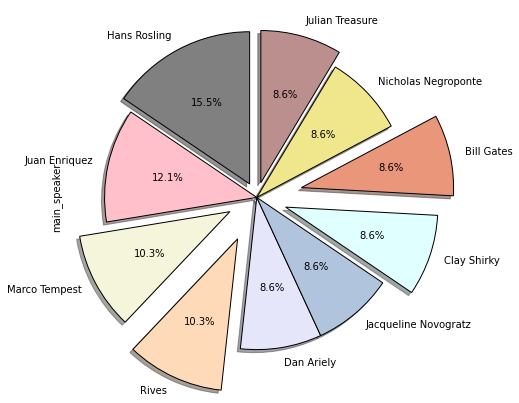

In [115]:
my_file_main["main_speaker"].value_counts().head(10).plot.pie(figsize =(10, 7),
                                  subplots=True,                                  
                                  autopct = lambda pct: func(pct, occupations),
                                  explode = explode2,
                                  shadow = True,
                                  colors = colors2,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

In [106]:

explode2 = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0, 0.2, 0.3, 0.0, 0.1)
colors2 = ( "grey","pink", "beige", "peachpuff", "lavender", "lightsteelblue", "lightcyan", "darksalmon", "khaki", "rosybrown")

array([<AxesSubplot:ylabel='speaker_occupation'>], dtype=object)

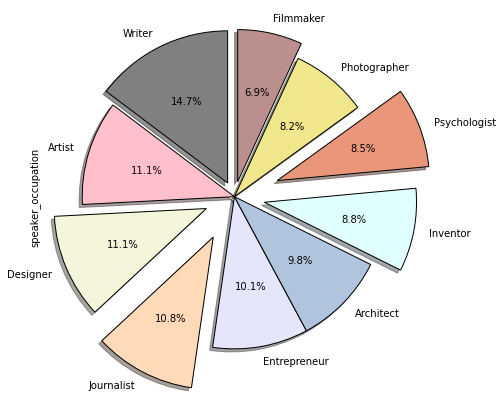

In [114]:
my_file_main["speaker_occupation"].value_counts().head(10).plot.pie(figsize =(10, 7),
                                  subplots=True,                                  
                                  autopct = lambda pct: func(pct, occupations),
                                  explode = explode2,
                                  shadow = True,
                                  colors = colors2,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

In [132]:
commentag = my_file_main.sort_values(by="comments").tail(100)["tags"]

In [133]:
commentag_text = ''
for row in commentag:
    list_r = row.strip('[]').split(',')
    for tag in list_r:
        commentag_text += tag.strip() + ' '
        
#commentag_text 

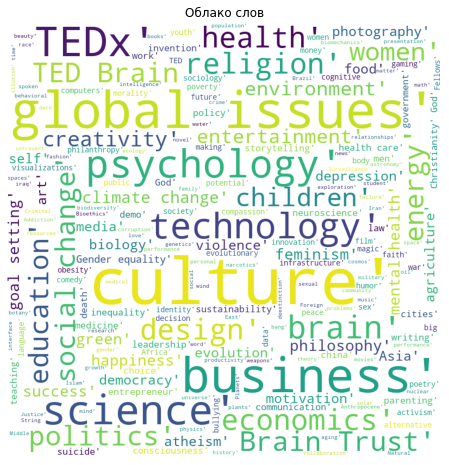

In [134]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(commentag_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

В данном Dataset-e тематика каждого выстпления задается списком тегов всех возможных затронутых тем. Посчитав частотность тегов (см ниже в разделе работы с ботом), видно, что самые частотные теги скорее более общие и от того и встречаются чаще, что сочетаются с многими остальными тегами. Исходя из этого, логичнее обращать внимание на чуть реже встречающие теги, которые более специфицированные. Таким образом, посмотрев на облако частотных тегов 100 самых обсуждаемых выступлений, тег culture - самый частотный тег, а значит более общий, что нас меньше интересует. Тогда можно сказать, что наиболее обсуждаемые темы выстплений скорее связаны с психологией, религией и технологиями. 

In [152]:
# проверка связи длины выстпления и кол-ва его просмотра
correlation = my_file_main[["duration", "views"]].head(100)

In [159]:
#correlation

In [153]:
correlation["norm_duration"] = correlation["duration"] / 60

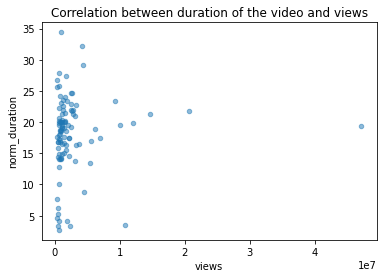

In [158]:
correlation.plot.scatter(
    x="views", 
    y="norm_duration",
    title="Correlation between duration of the video and views",
    alpha=0.5
);

Гипотиза о связи длины выстпления и его просматриваемости не подтвредилась.

# Работа с ботом

In [88]:
import sqlite3

In [32]:
# выбираем 100 самых просматриваемых выстпулений и берем оттуда теги
list_tags = list()
strings_tags = my_file_main.sort_values(by="views").tail(100)["tags"]

In [37]:
# делаем список из этих тегов
for row in strings_tags:
    list_row = row.strip('[]').split(',')
    for tag in list_row:
        list_tags.append(tag)

In [39]:
cnt = Counter(list_tags)

In [40]:
cnt.most_common() # смотрим частотность тегов

[(" 'culture'", 52),
 (" 'entertainment'", 44),
 (" 'psychology'", 40),
 (" 'technology'", 36),
 (" 'science'", 32),
 ("'business'", 28),
 ("'TEDx'", 26),
 ("'culture'", 26),
 (" 'health'", 24),
 (" 'business'", 22),
 (" 'brain'", 20),
 (" 'work'", 20),
 (" 'education'", 20),
 (" 'happiness'", 20),
 (" 'performance'", 18),
 (" 'motivation'", 18),
 (" 'design'", 18),
 (" 'success'", 18),
 (" 'mental health'", 16),
 (" 'global issues'", 16),
 (" 'humor'", 16),
 (" 'mind'", 14),
 (" 'creativity'", 14),
 (" 'music'", 12),
 (" 'leadership'", 12),
 (" 'social change'", 12),
 (" 'choice'", 12),
 (" 'storytelling'", 12),
 (" 'goal-setting'", 12),
 (" 'self'", 10),
 (" 'visualizations'", 10),
 (" 'communication'", 10),
 (" 'cognitive science'", 10),
 (" 'medicine'", 10),
 (" 'decision-making'", 10),
 (" 'personal growth'", 10),
 ("'children'", 8),
 (" 'live music'", 8),
 (" 'depression'", 8),
 (" 'poetry'", 8),
 (" 'productivity'", 8),
 (" 'magic'", 8),
 (" 'demo'", 8),
 ("'TED Brain Trust'", 8

In [44]:
# выбираем более специфичные/менее частотные,
# потому что самы частотные более общие, содержатся во многих темах
ltags = ['religion',
         'sports',
         'music', 
         'sex', 
         'feminism', 
         'language', 
         'astronomy', 
         'biology', 
         'narcotics',
         'environment',
         'health' , 
         'medicine',
         'photography',
         'mental health',
         'psychology',
         'economics']

In [46]:
# создаем ID тегов для базы данных
ltopics = list()
for tag in enumerate(ltags):
    ltopics.append(tag)

In [49]:
ltopics

[(0, 'religion'),
 (1, 'sports'),
 (2, 'music'),
 (3, 'sex'),
 (4, 'feminism'),
 (5, 'language'),
 (6, 'astronomy'),
 (7, 'biology'),
 (8, 'narcotics'),
 (9, 'environment'),
 (10, 'health'),
 (11, 'medicine'),
 (12, 'photography'),
 (13, 'mental health'),
 (14, 'psychology'),
 (15, 'economics')]

In [80]:
def get_tuple(i, name, url, idd):
    return (i, name, url, idd)  

In [94]:
# получаем список tuples с названием и ссылкой выступления
index = 0
final_list = list()
for i in range(2250):
    for topic in ltopics:
        if topic[1] in my_file_main["tags"][i]:
            video = get_tuple(index, my_file_main["name"][i], my_file_main["url"][i].strip('\n'), topic[0])
            index += 1
            final_list.append(video)       

1505

In [95]:
# подключаемся к базе и записываем в нее
con = sqlite3.connect('TEDtalks.db')
cur = con.cursor()

In [96]:
cur.executemany("INSERT INTO videos VALUES (?, ?, ?, ?)", final_list) # заполняем новую таблицу
con.commit()